# Setup

In [ ]:
!pip install pandas
!pip install ethnicolr
!pip install DeepFace

In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
from sklearn.model_selection import train_test_split
import IPython.display as display
from PIL import Image
from urllib.request import urlopen
import time
import requests
import csv
import io
from deepface import DeepFace
import matplotlib.pyplot as plt

# Labeling

In [ ]:
# Load the CSV file
df = pd.read_csv('merged_final.csv')


# Add a new column "true_label" filled with -1
if 'true_label' not in df.columns:
  df['true_label'] = "-1"

counter = df[df['true_label'] != "-1"].shape[0]

wait = 1
# Iterate over each row
for i, row in df.iterrows():
  if (row['true_label'] == "-1" and row['invalid'] == 1): # If the true label is -1
    try:
      print('Label counter: ',counter)
      # Open and display the image from the URL
      with urlopen(row['image']) as url:
        with open('temp.jpg', 'wb') as f:
          f.write(url.read())
        img = Image.open('temp.jpg')
        # Resize the image to 50%
        img = img.resize((img.width // 2, img.height // 2))
        display.display(img)

      # Ask for your input
      time.sleep(2)
      print("Label Guide: 0: Native American | 1: Asian | 2: Black | 3: Latino | 4: Middle Eastern/North African | 5: White | 8: Unknown/Not applicable | 9: Exit program")
      true_label = input("Enter the true label(s): ")
      # Check if the input is 9
      if true_label == '9':
        # Stop the loop
        break
      # Save the input to the DataFrame
      df.loc[i, 'true_label'] = " ".join([num for num in true_label.split()])

    except:
      print("Could not load image")
    finally:
      # Clear the output
      display.clear_output(wait=True)
      counter += 1

# Save the DataFrame to a new CSV file
df.to_csv('merged_final.csv', index=False)

# Download the new CSV file
files.download('merged_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# When reading the data:
df = pd.read_csv('example.csv')
df['true_label'] = df['true_label'].apply(lambda x: [int(num) for num in x.split()])
print(df['true_label'])

In [ ]:
response = requests.get('https://www.name-prism.com/api_token/nat/csv/b354822c882cae33/Monica')

# Define mapping from detailed to broader categories
ethnicity_mapping = {
    'Asian': ['EastAsian', 'SouthAsian', 'EastAsian-Indochina-Thailand',
              'EastAsian-Indochina-Vietnam', 'EastAsian-Indochina-Cambodia',
              'EastAsian-Indochina-Myanmar', 'EastAsian-Japan',
              'EastAsian-Chinese', 'EastAsian-South Korea',
              'EastAsian-Malay-Malaysia', 'EastAsian-Malay-Indonesia'],
    'Black': ['African', 'African-SouthAfrican', 'African-WestAfrican',
              'African-EastAfrican'],
    'Hispanic/Latino': ['Hispanic', 'Hispanic-Portuguese', 'Hispanic-Spanish',
                        'Hispanic-Philippines'],
    'Middle Eastern/North African': ['Muslim', 'Muslim-Pakistanis-Bangladesh',
                                     'Muslim-Nubian', 'Muslim-Turkic-CentralAsian',
                                     'Muslim-Persian', 'Muslim-Maghreb',
                                     'Muslim-Pakistanis-Pakistan', 'Muslim-ArabianPeninsula',
                                     'Muslim-Turkic-Turkey'],
    'White': ['European', 'CelticEnglish', 'Nordic', 'Greek', 'Jewish',
              'European-SouthSlavs', 'European-Italian-Italy', 'European-Baltics',
              'European-Italian-Romania', 'European-French',
              'Nordic-Scandinavian-Denmark', 'Nordic-Finland',
              'Nordic-Scandinavian-Sweden', 'Nordic-Scandinavian-Norway',
              'European-Russian', 'European-German', 'European-EastEuropean']
}

# Prepare a dictionary to store probabilities
probabilities = {
    'Asian': 0.0,
    'Black': 0.0,
    'Hispanic/Latino': 0.0,
    'Middle Eastern/North African': 0.0,
    'White': 0.0
}

# Check if the request was successful
if response.status_code == 200:
    csv_content = csv.reader(io.StringIO(response.text))

    for row in csv_content:
        # Get the ethnicity and probability
        ethnicity, probability = row[0], float(row[1])

        # Map the detailed ethnicity to the broader groups
        for broad_group, details in ethnicity_mapping.items():
            if any(detail in ethnicity for detail in details):
                probabilities[broad_group] += probability

    # Sort by probability in descending order
    sorted_probabilities = sorted(probabilities.items(), key=lambda x: x[1], reverse=True)

    # Print the top 2 broad ethnicities
    for ethnicity, probability in sorted_probabilities[:3]:
        print(f"Ethnicity: {ethnicity}, Probability: {probability}")
else:
    print(f"Request failed with status code {response.status_code}")


Ethnicity: White, Probability: 0.5407
Ethnicity: Hispanic/Latino, Probability: 0.33699999999999997
Ethnicity: Asian, Probability: 0.106


In [ ]:
# Define mapping from detailed to broader categories
ethnicity_mapping = {
    'Asian': ['EastAsian', 'SouthAsian', 'EastAsian-Indochina-Thailand',
              'EastAsian-Indochina-Vietnam', 'EastAsian-Indochina-Cambodia',
              'EastAsian-Indochina-Myanmar', 'EastAsian-Japan',
              'EastAsian-Chinese', 'EastAsian-South Korea',
              'EastAsian-Malay-Malaysia', 'EastAsian-Malay-Indonesia'],
    'Black': ['African', 'African-SouthAfrican', 'African-WestAfrican',
              'African-EastAfrican'],
    'Hispanic/Latino': ['Hispanic', 'Hispanic-Portuguese', 'Hispanic-Spanish',
                        'Hispanic-Philippines'],
    'Middle Eastern/North African': ['Muslim', 'Muslim-Pakistanis-Bangladesh',
                                     'Muslim-Nubian', 'Muslim-Turkic-CentralAsian',
                                     'Muslim-Persian', 'Muslim-Maghreb',
                                     'Muslim-Pakistanis-Pakistan', 'Muslim-ArabianPeninsula',
                                     'Muslim-Turkic-Turkey'],
    'White': ['European', 'CelticEnglish', 'Nordic', 'Greek', 'Jewish',
              'European-SouthSlavs', 'European-Italian-Italy', 'European-Baltics',
              'European-Italian-Romania', 'European-French',
              'Nordic-Scandinavian-Denmark', 'Nordic-Finland',
              'Nordic-Scandinavian-Sweden', 'Nordic-Scandinavian-Norway',
              'European-Russian', 'European-German', 'European-EastEuropean']
}




# Read the CSV file into a DataFrame
df = pd.read_csv('airbnb_cleaned.csv')

# If the 'Name Prism Label' and 'Name Prism Trust' columns don't exist, create them
if 'Name Prism Label' not in df.columns:
    df['Name Prism Label'] = None
if 'Name Prism Trust' not in df.columns:
    df['Name Prism Trust'] = None

# Create a dictionary to map ethnicities to their corresponding numbers
ethnicity_number_mapping = {
    'Asian': 1,
    'Black': 2,
    'Hispanic/Latino': 3,
    'Middle Eastern/North African': 4,
    'White': 5
}

# Iterate over each row in the DataFrame
for i, row in df.iterrows():
    name = row['name']
    time.sleep(0.72)
    response = requests.get(f'https://www.name-prism.com/api_token/nat/csv/b354822c882cae33/{name}')
    if((i%2000 == 0) & (i!=0)):
      # Save the DataFrame back to the CSV file
      df.to_csv('example_mod_final.csv', index=False)
      # Download the new CSV file
      files.download('example_mod_final.csv')
      time.sleep(3)

    # Check if the request was successful
    if response.status_code == 200:
        # Prepare a dictionary to store probabilities
        probabilities = {
            'Asian': 0.0,
            'Black': 0.0,
            'Hispanic/Latino': 0.0,
            'Middle Eastern/North African': 0.0,
            'White': 0.0
        }

        csv_content = csv.reader(io.StringIO(response.text))

        for row in csv_content:
            # Get the ethnicity and probability
            ethnicity, probability = row[0], float(row[1])

            # Map the detailed ethnicity to the broader groups
            for broad_group, details in ethnicity_mapping.items():
                if any(detail in ethnicity for detail in details):
                    probabilities[broad_group] += probability

        # Sort by probability in descending order
        sorted_probabilities = sorted(probabilities.items(), key=lambda x: x[1], reverse=True)

        # Get the top ethnicity and its corresponding probability
        top_ethnicity, top_probability = sorted_probabilities[0]

        # Update the 'Name Prism Label' and 'Name Prism Trust' columns
        df.loc[i, 'Name Prism Label'] = ethnicity_number_mapping[top_ethnicity]
        df.loc[i, 'Name Prism Trust'] = top_probability

# Save the DataFrame back to the CSV file
df.to_csv('example_mod_final.csv', index=False)

# Download the new CSV file
files.download('example_mod_final.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
df = pd.read_csv('name_prism (9).csv')
# Define columns to be deleted
columns_to_delete = ['genderize', 'opencv', 'opencv_pred', 'genderize_pred']

# Delete the columns
df = df.drop(columns_to_delete, axis=1, errors='ignore')
df.to_csv('name_prisma.csv', index=False)

# Download the new CSV file
files.download('name_prisma.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('name_prism (9).csv')
# Define columns to be deleted
columns_to_delete = ['genderize', 'opencv', 'opencv_pred', 'genderize_pred']

# Delete the columns
df = df.drop(columns_to_delete, axis=1, errors='ignore')

# Define columns for each detailed ethnicity if they do not exist
detailed_ethnicities = [
    'European-SouthSlavs', 'Muslim-Pakistanis-Bangladesh', 'European-Italian-Italy',
    'European-Baltics', 'African-SouthAfrican', 'European-Italian-Romania',
    'Muslim-Nubian', 'European-French', 'EastAsian-Indochina-Thailand',
    'EastAsian-Indochina-Vietnam', 'Jewish', 'Muslim-Turkic-CentralAsian',
    'EastAsian-Indochina-Cambodia', 'Nordic-Scandinavian-Denmark',
    'EastAsian-Indochina-Myanmar', 'Nordic-Finland', 'Muslim-Persian',
    'Nordic-Scandinavian-Sweden', 'Muslim-Maghreb', 'Greek',
    'Muslim-Pakistanis-Pakistan', 'Hispanic-Portuguese', 'European-Russian',
    'Muslim-ArabianPeninsula', 'African-WestAfrican', 'EastAsian-Japan',
    'European-German', 'EastAsian-Chinese', 'SouthAsian', 'Hispanic-Spanish',
    'Nordic-Scandinavian-Norway', 'Muslim-Turkic-Turkey', 'Hispanic-Philippines',
    'CelticEnglish', 'EastAsian-Malay-Malaysia', 'EastAsian-South Korea',
    'African-EastAfrican', 'European-EastEuropean', 'EastAsian-Malay-Indonesia'
]
for ethnicity in detailed_ethnicities:
    if ethnicity not in df.columns:
        df[ethnicity] = None

# Iterate over each row in the DataFrame
for i, row in df.iterrows():
    # Skip if this row is already classified
    if not pd.isnull(row[detailed_ethnicities[0]]):  # Just check the first column for simplicity
        continue

    name = row['name']
    time.sleep(0.72)
    response = requests.get(f'https://www.name-prism.com/api_token/nat/csv/b354822c882cae33/{name}')
    if((i%500 == 0) & (i!=0)):
      # Save the DataFrame back to the CSV file
      df.to_csv('name_prism.csv', index=False)
      # Download the new CSV file
      files.download('name_prism.csv')
      time.sleep(3)

    # Check if the request was successful
    if response.status_code == 200:
        csv_content = csv.reader(io.StringIO(response.text))

        for row in csv_content:
            # Get the ethnicity and probability
            ethnicity, probability = row[0], float(row[1])

            # Check if this ethnicity exists in the DataFrame
            if ethnicity in df.columns:
                df.loc[i, ethnicity] = probability

# Save the DataFrame back to the CSV file
df.to_csv('name_prism_final.csv', index=False)

# Download the new CSV file
files.download('name_prism_final.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Define the lower and upper bounds
lower_bound = 0.98
upper_bound = 1.02

# Calculate the sum of probabilities for each row
sums = df[detailed_ethnicities].sum(axis=1)

# Count the number of rows where the sum is between the bounds
count = ((sums > lower_bound) & (sums < upper_bound)).sum()
# Calculate the total number of rows
total_rows = df.shape[0]

# Calculate the percentage of rows that fall within the specified range
percentage = (count / total_rows) * 100

print(f"Total number of rows: {total_rows}")
print(f"Number of rows with sum of probabilities between {lower_bound} and {upper_bound}: {count}")
print(f"Percentage of rows within range: {percentage:.2f}%")


Total number of rows: 9498
Number of rows with sum of probabilities between 0.98 and 1.02: 9498
Percentage of rows within range: 100.00%


In [ ]:
response = requests.get(f'https://www.name-prism.com/api_token/nat/csv/b354822c882cae33/Aziz')
csv_content = csv.reader(io.StringIO(response.text))
for row in csv_content:
            # Get the ethnicity and probability
            ethnicity, probability = row[0], float(row[1])
            print(ethnicity)

European-SouthSlavs
Muslim-Pakistanis-Bangladesh
European-Italian-Italy
European-Baltics
African-SouthAfrican
European-Italian-Romania
Muslim-Nubian
European-French
EastAsian-Indochina-Thailand
EastAsian-Indochina-Vietnam
Jewish
Muslim-Turkic-CentralAsian
EastAsian-Indochina-Cambodia
Nordic-Scandinavian-Denmark
EastAsian-Indochina-Myanmar
Nordic-Finland
Muslim-Persian
Nordic-Scandinavian-Sweden
Muslim-Maghreb
Greek
Muslim-Pakistanis-Pakistan
Hispanic-Portuguese
European-Russian
Muslim-ArabianPeninsula
African-WestAfrican
EastAsian-Japan
European-German
EastAsian-Chinese
SouthAsian
Hispanic-Spanish
Nordic-Scandinavian-Norway
Muslim-Turkic-Turkey
Hispanic-Philippines
CelticEnglish
EastAsian-Malay-Malaysia
EastAsian-South Korea
African-EastAfrican
European-EastEuropean
EastAsian-Malay-Indonesia


In [ ]:


# Define mapping from detailed to broader categories
ethnicity_mapping = {
    'Asian': ['EastAsian'],
    'Black': ['African'],
    'Hispanic/Latino': ['Hispanic'],
    'Middle Eastern/North African': ['Muslim'],
    'White': ['European', 'CelticEnglish', 'Nordic', 'Greek', 'Jewish']
}

# Read the CSV file into a DataFrame
df = pd.read_csv('example.csv')

# If the 'Name Prism Label' and 'Name Prism Trust' columns don't exist, create them
if 'Name Prism Label' not in df.columns:
    df['Name Prism Label'] = None
if 'Name Prism Trust' not in df.columns:
    df['Name Prism Trust'] = None

# Create a dictionary to map ethnicities to their corresponding numbers
ethnicity_number_mapping = {
    'Asian': 1,
    'Black': 2,
    'Hispanic/Latino': 3,
    'Middle Eastern/North African': 4,
    'White': 5
}

# Number of names to process
num_names = 120

# Iterate over each row in the DataFrame
for i, row in df.iterrows():
    if i >= num_names:
        break

    name = row['name']
    time.sleep(0.8)
    response = requests.get(f'https://www.name-prism.com/api_token/nat/csv/b354822c882cae33/{name}')

    # Check if the request was successful
    if response.status_code == 200:
        # Prepare a dictionary to store probabilities
        probabilities = {
            'Asian': 0.0,
            'Black': 0.0,
            'Hispanic/Latino': 0.0,
            'Middle Eastern/North African': 0.0,
            'White': 0.0
        }

        csv_content = csv.reader(io.StringIO(response.text))

        for row in csv_content:
            # Get the ethnicity and probability
            ethnicity, probability = row[0], float(row[1])

            # Map the detailed ethnicity to the broader groups
            for broad_group, details in ethnicity_mapping.items():
                if any(detail in ethnicity for detail in details):
                    probabilities[broad_group] += probability

        # Sort by probability in descending order
        sorted_probabilities = sorted(probabilities.items(), key=lambda x: x[1], reverse=True)

        # Get the top ethnicity and its corresponding probability
        top_ethnicity, top_probability = sorted_probabilities[0]

        # Update the 'Name Prism Label' and 'Name Prism Trust' columns
        df.loc[i, 'Name Prism Label'] = ethnicity_number_mapping[top_ethnicity]
        df.loc[i, 'Name Prism Trust'] = int(top_probability >= 0.5)

# Save the DataFrame back to the CSV file
df.to_csv('example_mod.csv', index=False)


# Download the new CSV file
files.download('example_mod.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Deepface

In [ ]:
prediction = DeepFace.analyze("download (24).png",enforce_detection = 0,actions = ['race'])
prediction

[]

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('example_mod_final2 (9).csv')
columns_to_delete = ['genderize', 'opencv', 'opencv_pred', 'genderize_pred']
# Delete the columns
df = df.drop(columns_to_delete, axis=1, errors='ignore')

# Define all the races we'll be dealing with
races = ['asian', 'indian', 'black', 'white', 'middle eastern', 'latino hispanic']

# Create new columns for the probabilities of each race for the first and second face

# Create an invalid column
if 'invalid' not in df.columns:
  for race in races:
    df[f'deepface_{race}'] = None

  for race in races:
    df[f'deepface_{race}2'] = None

  df['invalid'] = 0

# Iterate over each row in the DataFrame
for i, row in df.iterrows():

    if df.loc[i, 'invalid'] != 0 or any(pd.notna(row[f'deepface_{race}']) for race in races):
        continue
    image_path = row['image']

    # Get the DeepFace analysis for the image
    obj = DeepFace.analyze(img_path=image_path, enforce_detection = 0, actions=['race'], silent = 1)

    # If no faces were detected or 3 or more faces were detected, mark as invalid and continue
    if len(obj) == 0:
        df.loc[i, 'invalid'] = 3
        continue
    elif len(obj) >= 3:
        df.loc[i, 'invalid'] = 2
        continue
    elif len(obj) ==2:
        df.loc[i, 'invalid'] = 1

    for j, face in enumerate(obj):
        # We only want to deal with the first 2 faces
        if j > 1:
            break
        for race in races:
            column_name = f'deepface_{race}' if j == 0 else f'deepface_{race}2'
            df.loc[i, column_name] = face['race'][race]

    if (i%500 == 0) and (i !=0 ):
        print(i)
        # Save the DataFrame back to the CSV file
        df.to_csv('example_mod_final2.csv', index=False)
        # Download the new CSV file
        files.download('example_mod_final2.csv')
        time.sleep(10)

# Save the DataFrame back to the CSV file
df.to_csv('deepface_mods_final.csv', index=False)

# Download the new CSV file
files.download('deepface_mods_final.csv')


9000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('deepface_mods_final.csv')

# Define all the races we'll be dealing with
races = ['asian', 'indian', 'black', 'white', 'middle eastern', 'latino hispanic']

# Initialize counters
no_face = 0
one_face = 0
one_face_correct = 0
two_faces = 0
two_faces_correct = 0
three_or_more_faces = 0

# Iterate over each row in the DataFrame
for i, row in df.iterrows():
    if row['invalid'] == 3:
        no_face += 1
    elif row['invalid'] == 2:
        three_or_more_faces += 1
    elif pd.isna(row['deepface_asian2']):
        one_face += 1
        face_sum = sum(row[f'deepface_{race}'] for race in races)
        if 99.5 <= face_sum <= 100.5:
            one_face_correct += 1
    else:
        two_faces += 1
        face1_sum = sum(row[f'deepface_{race}'] for race in races)
        face2_sum = sum(row[f'deepface_{race}2'] for race in races)
        if 99.5 <= face1_sum <= 100.5 and 99.5 <= face2_sum <= 100.5:
            two_faces_correct += 1

print(f"Number of rows where no face was detected: {no_face}")
print(f"Number of rows where 1 face was detected: {one_face}")
print(f"Number of rows where 1 face was detected and the probabilities sum to approximately 1: {one_face_correct}")
print(f"Number of rows where 2 faces were detected: {two_faces}")
print(f"Number of rows where 2 faces were detected and the probabilities for both faces sum to approximately 1: {two_faces_correct}")
print(f"Number of rows where 3 or more faces were detected: {three_or_more_faces}")


Number of rows where no face was detected: 3027
Number of rows where 1 face was detected: 4996
Number of rows where 1 face was detected and the probabilities sum to approximately 1: 4996
Number of rows where 2 faces were detected: 1135
Number of rows where 2 faces were detected and the probabilities for both faces sum to approximately 1: 1135
Number of rows where 3 or more faces were detected: 340


In [ ]:
# Load the CSV file
df = pd.read_csv('merged_final.csv')

# Add a new column "true_number" filled with -1
if 'true_number' not in df.columns:
    df['true_number'] = -1

counter = df[df['true_number'] != -1].shape[0]

# Iterate over each row
for i, row in df.iterrows():
    if (row['true_number'] == -1 and row['invalid'] != 1): # If the true number is -1
        try:
            print('Predicted =', row['invalid'])
            print('Label counter: ',counter)
            # Open and display the image from the URL
            with urlopen(row['image']) as url:
                with open('temp.jpg', 'wb') as f:
                    f.write(url.read())
                img = Image.open('temp.jpg')
                # Resize the image to 50%
                img = img.resize((img.width // 2, img.height // 2))
                display.display(img)

            # Ask for your input
            time.sleep(1)
            print("Label Guide: 0: 0 faces | 1: 1 face | 2: 2 faces | 3: 3 or more faces")
            true_number = input("Enter the true number of faces: ")
            # Check if the input is 'exit'
            if true_number.lower() == 'exit':
                # Stop the loop
                break
            # Save the input to the DataFrame
            df.loc[i, 'true_number'] = int(true_number)

        except:
            print("Could not load image")
        finally:
            # Clear the output
            display.clear_output(wait=True)
            counter += 1

# Save the DataFrame to a new CSV file
df.to_csv('merged_final.csv', index=False)

# Download the new CSV file
files.download('merged_final.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Load the CSV file
df = pd.read_csv('deepface_mod_label.csv')

# Filter rows that have been labelled
df = df[df['true_number'] != -1]

# Create a mapping for the 'invalid' column
invalid_mapping = {0: 1, 1: 2, 2: 3, 3: 0}

# Create a new column 'deepface_number' to map 'invalid' to the actual number of faces
df['deepface_number'] = df['invalid'].map(invalid_mapping)

# Calculate the accuracy for each category
accuracy_0 = sum(df[df['true_number'] == 0]['deepface_number'] == df[df['true_number'] == 0]['true_number']) / len(df[df['true_number'] == 0])
accuracy_2 = sum(df[df['true_number'] == 2]['deepface_number'] == df[df['true_number'] == 2]['true_number']) / len(df[df['true_number'] == 2])
accuracy_3 = sum(df[df['true_number'] == 3]['deepface_number'] == df[df['true_number'] == 3]['true_number']) / len(df[df['true_number'] == 3])

# Print the accuracy for each category
print(f'Accuracy for 0 faces: {accuracy_0 * 100}%')
print(f'Accuracy for 2 faces: {accuracy_2 * 100}%')
print(f'Accuracy for 3 or more faces: {accuracy_3 * 100}%')


Accuracy for 0 faces: 100.0%
Accuracy for 2 faces: 39.130434782608695%
Accuracy for 3 or more faces: 38.88888888888889%


In [ ]:
# Load the CSV file
df = pd.read_csv('deepface_mod_label.csv')

# Filter rows that have been labelled
df = df[df['true_number'] != -1]

# Create a mapping for the 'invalid' column
invalid_mapping = {0: 1, 1: 2, 2: 3, 3: 0}

# Create a new column 'deepface_number' to map 'invalid' to the actual number of faces
df['deepface_number'] = df['invalid'].map(invalid_mapping)

# Calculate the accuracy for each category
accuracy_true_0 = sum(df[df['true_number'] == 0]['deepface_number'] == df[df['true_number'] == 0]['true_number']) / len(df[df['true_number'] == 0])
accuracy_true_2 = sum(df[df['true_number'] == 2]['deepface_number'] == df[df['true_number'] == 2]['true_number']) / len(df[df['true_number'] == 2])
accuracy_true_3 = sum(df[df['true_number'] == 3]['deepface_number'] == df[df['true_number'] == 3]['true_number']) / len(df[df['true_number'] == 3])

accuracy_pred_0 = sum(df[df['deepface_number'] == 0]['true_number'] == df[df['deepface_number'] == 0]['deepface_number']) / len(df[df['deepface_number'] == 0])
accuracy_pred_2 = sum(df[df['deepface_number'] == 2]['true_number'] == df[df['deepface_number'] == 2]['deepface_number']) / len(df[df['deepface_number'] == 2])
accuracy_pred_3 = sum(df[df['deepface_number'] == 3]['true_number'] == df[df['deepface_number'] == 3]['deepface_number']) / len(df[df['deepface_number'] == 3])

# Print the accuracy for each category
print(f'Accuracy for 0 faces (true label): {accuracy_true_0 * 100}%')
print(f'Accuracy for 2 faces (true label): {accuracy_true_2 * 100}%')
print(f'Accuracy for 3 or more faces (true label): {accuracy_true_3 * 100}%')
print()
print(f'Accuracy for 0 faces (deepface prediction): {accuracy_pred_0 * 100}%')
print(f'Accuracy for 2 faces (deepface prediction): {accuracy_pred_2 * 100}%')
print(f'Accuracy for 3 or more faces (deepface prediction): {accuracy_pred_3 * 100}%')


Accuracy for 0 faces (true label): 100.0%
Accuracy for 2 faces (true label): 39.130434782608695%
Accuracy for 3 or more faces (true label): 38.88888888888889%

Accuracy for 0 faces (deepface prediction): 14.184397163120568%
Accuracy for 2 faces (deepface prediction): 38.297872340425535%
Accuracy for 3 or more faces (deepface prediction): 58.333333333333336%


# Analysis


In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('example_mod_final.csv')

# Create the 'NamePrism Check' column
df['NamePrism Check'] = None

# Iterate over the DataFrame rows
for i, row in df.iterrows():
    # If the true label is not -1 and is not 8
    if row['true_label'] != '-1' and row['true_label'] != '8':
        # Split the true labels into a list of integers
        true_labels = list(map(int, row['true_label'].split()))

        # If the NamePrism label is in the list of true labels
        if row['Name Prism Label'] in true_labels:
            # Mark the check column as 1
            df.loc[i, 'NamePrism Check'] = 1
        else:
            # Mark the check column as 0
            df.loc[i, 'NamePrism Check'] = 0
    elif row['true_label'] == '8':
        # If the true label is 8, mark the check column as 8
        df.loc[i, 'NamePrism Check'] = 8

# Save the DataFrame back to the CSV file
df.to_csv('example_mod_final.csv', index=False)


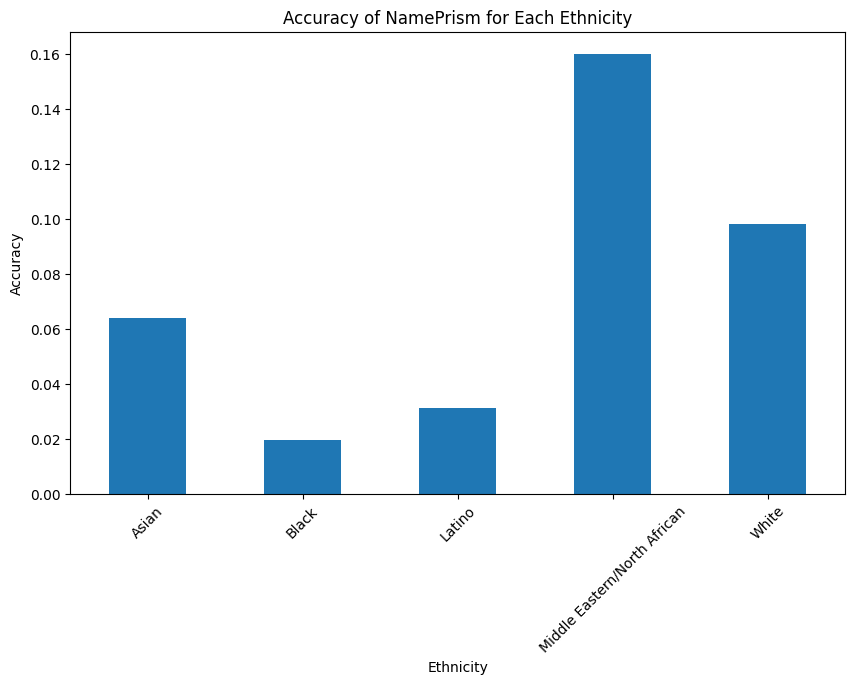

In [ ]:
label_to_ethnicity = {
    1: 'Asian',
    2: 'Black',
    3: 'Latino',
    4: 'Middle Eastern/North African',
    5: 'White',
}

# Create a dictionary to store the accuracy for each ethnicity
accuracy_per_ethnicity = {}

# Iterate over the range of labels (1 to 7)
for label, ethnicity in label_to_ethnicity.items():
    # Get the rows where NamePrism prediction is the current label
    predicted_rows = df[df['Name Prism Label'] == label]

    # Calculate how many of these predictions are correct
    correct_predictions = sum(predicted_rows['true_label'].apply(lambda x: str(label) in x.split(' ')))

    # Calculate the accuracy and store it in the dictionary
    accuracy_per_ethnicity[ethnicity] = correct_predictions / len(predicted_rows)

# Convert the dictionary to a pandas Series for easier plotting
accuracy_series = pd.Series(accuracy_per_ethnicity)

# Plot the accuracy for each ethnicity
accuracy_series.plot(kind='bar', figsize=(10, 6), rot=45)
plt.title('Accuracy of NamePrism for Each Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Accuracy')
plt.show()

plt.show()


In [ ]:
# Read the CSV file into a DataFrame
df = pd.read_csv('example_mod_final.csv')

# List of all ethnicities
ethnicities = [1, 2, 3, 4, 5]

# Store accuracy for each ethnicity
accuracy_per_ethnicity = {}

# For each ethnicity
for ethnicity in ethnicities:
    # Filter rows where NamePrism Label equals the ethnicity
    ethnicity_df = df[df['Name Prism Label'] == ethnicity]

    # Calculate accuracy as percentage of correct predictions
    correct_predictions = ethnicity_df[ethnicity_df['NamePrism Check'] == 1].shape[0]
    total_predictions = ethnicity_df.shape[0]

    # In case there are no predictions for this ethnicity, we avoid division by zero
    if total_predictions != 0:
        accuracy = (correct_predictions / total_predictions) * 100
    else:
        accuracy = 0

    # Store the accuracy
    accuracy_per_ethnicity[ethnicity] = accuracy

# Convert dictionary to a pandas Series for easy plotting
accuracy_series = pd.Series(accuracy_per_ethnicity)

# Plot the accuracy for each ethnicity
accuracy_series.plot(kind='bar', figsize=(10,6))

plt.title('Accuracy of NamePrism predictions for each ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Accuracy (%)')
plt.show()


IndexError: ignored

In [ ]:
def transform_label(label):
    if '8' in label:
        return '8'
    elif '5' in label and len(label.split()) == 1:
        return '0'
    elif '5' in label and len(label.split()) > 1:
        return '2'
    else:
        return '1'

# Apply the transformation function to 'true_label' and 'Name Prism Label' columns
df['General true_label'] = df['true_label'].apply(transform_label)
df['General NamePrism'] = df['Name Prism Label'].apply(transform_label)

# Generate 'General NamePrism Check' column
df['General NamePrism Check'] = df.apply


TypeError: ignored

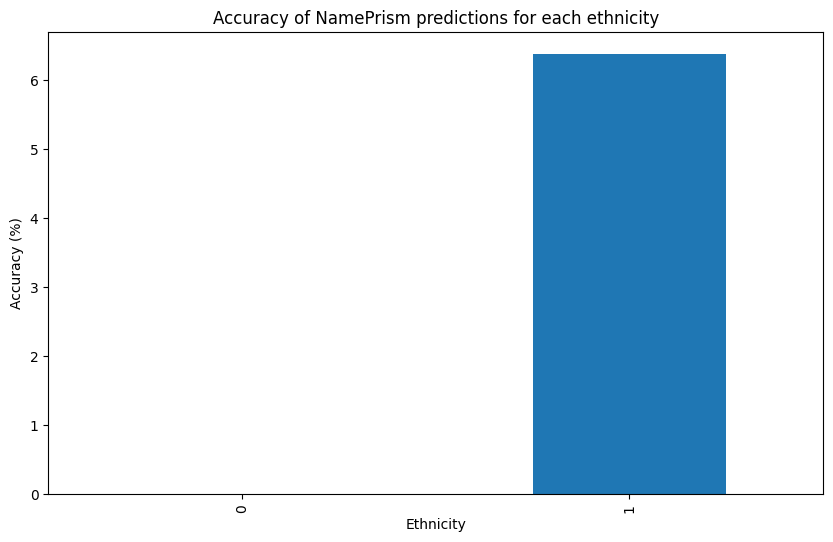

In [ ]:
# List of all ethnicities
ethnicities = [0,1]

# Store accuracy for each ethnicity
accuracy_per_ethnicity = {}

# For each ethnicity
for ethnicity in ethnicities:
    # Filter rows where NamePrism Label equals the ethnicity
    ethnicity_df = df[df['Name Prism Label'] == ethnicity]

    # Calculate accuracy as percentage of correct predictions
    correct_predictions = ethnicity_df[ethnicity_df['NamePrism Check'] == 1].shape[0]
    total_predictions = ethnicity_df.shape[0]

    # In case there are no predictions for this ethnicity, we avoid division by zero
    if total_predictions != 0:
        accuracy = (correct_predictions / total_predictions) * 100
    else:
        accuracy = 0

    # Store the accuracy
    accuracy_per_ethnicity[ethnicity] = accuracy

# Convert dictionary to a pandas Series for easy plotting
accuracy_series = pd.Series(accuracy_per_ethnicity)

# Plot the accuracy for each ethnicity
accuracy_series.plot(kind='bar', figsize=(10,6))

plt.title('Accuracy of NamePrism predictions for each ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Accuracy (%)')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the CSV file
df = pd.read_csv('example_mod_final.csv')

# Filter rows where 'true_label' is not -1
labeled_data = df[df['true_label'] != "-1"]

# Function to split and return series
def split_labels(label):
    return pd.Series(label.split())

# Create a dataframe with split labels
split_label_data = labeled_data['true_label'].apply(split_labels)

# Count the number of each label
ethnicity_counts = split_label_data.stack().value_counts()

# Create a dictionary mapping labels to ethnicities
ethnicity_dict = {
    '0': 'Native American',
    '1': 'Asian',
    '2': 'Black',
    '3': 'Latino',
    '4': 'Middle Eastern/North African',
    '5': 'White',
    '8': 'Unknown/Not applicable'
}

# Create a new Series with the counts, but with the labels replaced by the ethnicities
ethnicity_counts = ethnicity_counts.rename(index=ethnicity_dict)

# Plot pie chart
fig, ax = plt.subplots()
ax.pie(ethnicity_counts, labels=ethnicity_counts.index, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Ethnic distribution')
plt.show()


General Accuracy: 28.000000000000004%


In [ ]:
df = pd.read_csv('example_mod_final.csv')
df.columns

Index(['guest_id', 'name', 'image', 'deepface_asian', 'deepface_indian',
       'deepface_black', 'deepface_white', 'deepface_middle eastern',
       'deepface_latino hispanic', 'deepface_asian2', 'deepface_indian2',
       'deepface_black2', 'deepface_white2', 'deepface_middle eastern2',
       'deepface_latino hispanic2', 'invalid', 'true_number', 'true_label'],
      dtype='object')

In [ ]:
df = pd.read_csv('name_prism_final.csv')
df.columns

Index(['guest_id', 'name', 'image', 'European-SouthSlavs',
       'Muslim-Pakistanis-Bangladesh', 'European-Italian-Italy',
       'European-Baltics', 'African-SouthAfrican', 'European-Italian-Romania',
       'Muslim-Nubian', 'European-French', 'EastAsian-Indochina-Thailand',
       'EastAsian-Indochina-Vietnam', 'Jewish', 'Muslim-Turkic-CentralAsian',
       'EastAsian-Indochina-Cambodia', 'Nordic-Scandinavian-Denmark',
       'EastAsian-Indochina-Myanmar', 'Nordic-Finland', 'Muslim-Persian',
       'Nordic-Scandinavian-Sweden', 'Muslim-Maghreb', 'Greek',
       'Muslim-Pakistanis-Pakistan', 'Hispanic-Portuguese', 'European-Russian',
       'Muslim-ArabianPeninsula', 'African-WestAfrican', 'EastAsian-Japan',
       'European-German', 'EastAsian-Chinese', 'SouthAsian',
       'Hispanic-Spanish', 'Nordic-Scandinavian-Norway',
       'Muslim-Turkic-Turkey', 'Hispanic-Philippines', 'CelticEnglish',
       'EastAsian-Malay-Malaysia', 'EastAsian-South Korea',
       'African-EastAfrican', 

In [ ]:
import pandas as pd

# Load the CSV files
df1 = pd.read_csv('example_mod_final.csv')
df2 = pd.read_csv('name_prism_final.csv')

# Rename columns in df2 to have 'NamePrism_' before the original column name, but excluding 'guest_id', 'name', and 'image' columns
df2 = df2.rename(columns={col: 'NamePrism_'+col for col in df2.columns if col not in ['guest_id', 'name', 'image']})

# Merge the two dataframes on 'guest_id', 'name' and 'image'
df_merged = pd.merge(df1, df2, on=['guest_id', 'name', 'image'])

# Save the merged dataframe to a new CSV file
df_merged.to_csv('merged_final.csv', index=False)

In [ ]:
df_merged.columns

Index(['guest_id', 'name', 'image', 'deepface_asian', 'deepface_indian',
       'deepface_black', 'deepface_white', 'deepface_middle eastern',
       'deepface_latino hispanic', 'deepface_asian2', 'deepface_indian2',
       'deepface_black2', 'deepface_white2', 'deepface_middle eastern2',
       'deepface_latino hispanic2', 'invalid', 'true_number', 'true_label',
       'NamePrism_European-SouthSlavs',
       'NamePrism_Muslim-Pakistanis-Bangladesh',
       'NamePrism_European-Italian-Italy', 'NamePrism_European-Baltics',
       'NamePrism_African-SouthAfrican', 'NamePrism_European-Italian-Romania',
       'NamePrism_Muslim-Nubian', 'NamePrism_European-French',
       'NamePrism_EastAsian-Indochina-Thailand',
       'NamePrism_EastAsian-Indochina-Vietnam', 'NamePrism_Jewish',
       'NamePrism_Muslim-Turkic-CentralAsian',
       'NamePrism_EastAsian-Indochina-Cambodia',
       'NamePrism_Nordic-Scandinavian-Denmark',
       'NamePrism_EastAsian-Indochina-Myanmar', 'NamePrism_Nordic-Fin

In [ ]:
df_merged

,guest_id,name,image,deepface_asian,deepface_indian,deepface_black,deepface_white,deepface_middle eastern,deepface_latino hispanic,deepface_asian2,...,NamePrism_Hispanic-Spanish,NamePrism_Nordic-Scandinavian-Norway,NamePrism_Muslim-Turkic-Turkey,NamePrism_Hispanic-Philippines,NamePrism_CelticEnglish,NamePrism_EastAsian-Malay-Malaysia,NamePrism_EastAsian-South Korea,NamePrism_African-EastAfrican,NamePrism_European-EastEuropean,NamePrism_EastAsian-Malay-Indonesia
0,93292025,Harjinder,https://a0.muscache.com/im/pictures/user/5f09d...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0005,0.0003,0.0000,0.0016,0.1011,0.0005,0.0000,0.0000,0.0000,0.0000
1,183639942,Taylor,https://a0.muscache.com/im/pictures/user/98383...,5.917159e-04,2.444860e-01,1.228808e-04,53.419501,4.480564e+01,1.529657,NaN,...,0.0006,0.0000,0.0000,0.0023,0.9843,0.0004,0.0000,0.0006,0.0003,0.0001
2,37846734,John,https://a0.muscache.com/im/pictures/user/054a0...,7.454198e-13,2.445449e-11,1.171675e-15,99.999207,4.675522e-04,0.000329,NaN,...,0.0004,0.0003,0.0000,0.0211,0.6356,0.0034,0.0002,0.1434,0.0002,0.0005
3,48408491,Andrew,https://a0.muscache.com/im/pictures/user/3f125...,9.999976e+01,4.945082e-06,1.493552e-09,0.000094,2.202549e-09,0.000137,NaN,...,0.0001,0.0000,0.0000,0.0035,0.8422,0.0047,0.0004,0.1024,0.0001,0.0039
4,51146446,Stephanie,https://a0.muscache.com/im/pictures/user/c7457...,5.683615e+01,5.171231e-01,1.433331e-01,32.356786,2.545941e+00,7.600672,NaN,...,0.0038,0.0000,0.0000,0.0030,0.0190,0.0009,0.0000,0.0004,0.0000,0.0109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,26610572,Maj,https://a0.muscache.com/im/pictures/user/940cb...,2.392566e-02,2.633939e-02,1.556720e-03,87.961632,4.666781e+00,7.319766,NaN,...,0.0007,0.0564,0.0000,0.0151,0.1559,0.0026,0.0000,0.0042,0.0006,0.0002
9494,11228108,June,https://a0.muscache.com/im/pictures/user/526f4...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0001,0.0041,0.0000,0.0671,0.5206,0.0593,0.0008,0.0155,0.0004,0.0088
9495,210383801,Lucie,https://a0.muscache.com/im/pictures/user/eeb16...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0000,0.0000,0.0000,0.0000,0.0013,0.0000,0.0000,0.0001,0.0110,0.0000
9496,15554393,Priscilla,https://a0.muscache.com/im/pictures/user/2ac80...,6.995009e+01,3.743939e+00,1.309612e+00,13.132593,2.047409e+00,9.816355,NaN,...,0.0086,0.0000,0.0000,0.0018,0.0434,0.0091,0.0000,0.0590,0.0000,0.1000


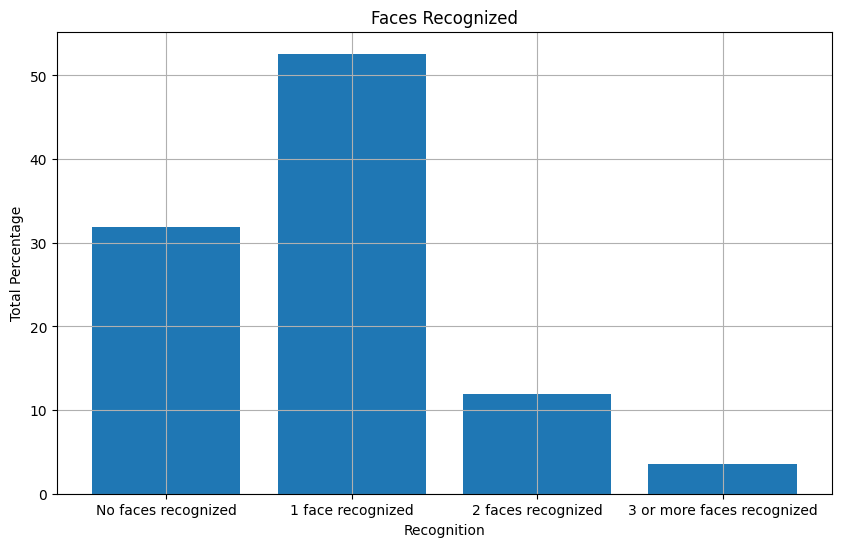

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged CSV file
df = pd.read_csv('merged_final.csv')

# Calculate the relative frequencies of each "invalid" value
rel_freq = df['invalid'].value_counts(normalize=True).sort_index()

# Convert to percentage
percentage = rel_freq * 100

# Define labels
labels = ['No faces recognized','1 face recognized', '2 faces recognized', '3 or more faces recognized']

# Create the bar plot
plt.figure(figsize=(10,6))
plt.bar(labels, percentage)

# Add title and labels
plt.title('Faces Recognized')
plt.xlabel('Recognition')
plt.ylabel('Total Percentage')

# Turn on the grid
plt.grid()

# Show the plot
plt.show()


In [ ]:
# Define the mapping
invalid_mapping = {0:1, 1:2, 2:3, 3:0}

# Replace the values
df['invalid'] = df['invalid'].replace(invalid_mapping)

# Save the DataFrame to a new CSV file
df.to_csv('merged_final.csv', index=False)


In [ ]:
(df['true_number'] >= 0).mean() * len(df)

200.0

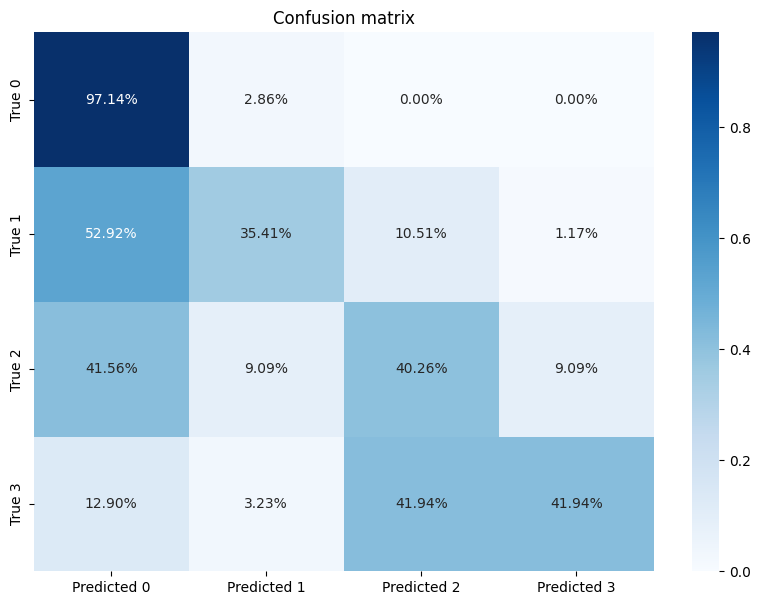

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Filter rows where 'true_number' is not -1
df_filtered = df[df['true_number'] != -1]

# Calculate confusion matrix
matrix = confusion_matrix(df_filtered['true_number'], df_filtered['invalid'])

# Normalize the matrix to get percentages
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Convert matrix to dataframe to label indices for better visualisation
matrix_df = pd.DataFrame(matrix, columns=[f"Predicted {i}" for i in range(4)], index=[f"True {i}" for i in range(4)])

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion matrix')
plt.show()


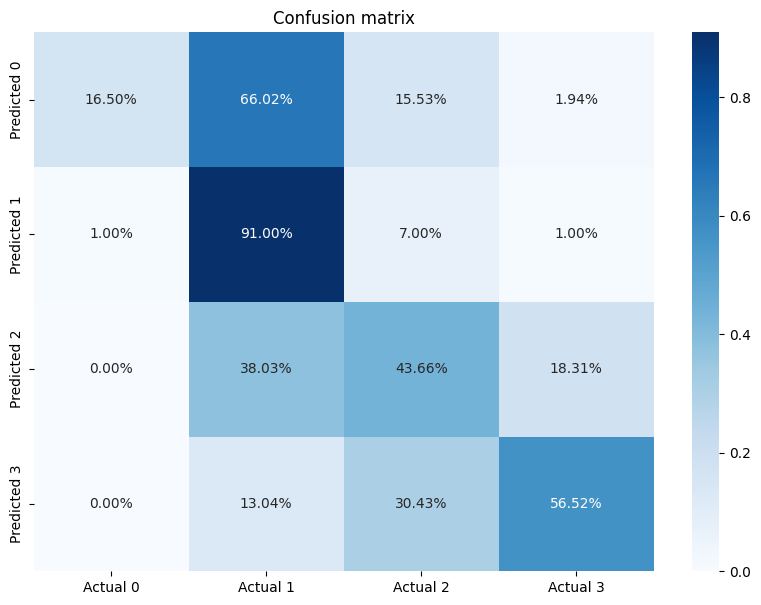

In [ ]:
 from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Filter rows where 'true_number' is not -1
df_filtered = df[df['true_number'] != -1]

# Calculate confusion matrix (notice the reversed order of arguments)
matrix = confusion_matrix(df_filtered['invalid'], df_filtered['true_number'])

# Normalize the matrix to get percentages
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Convert matrix to dataframe to label indices for better visualisation
matrix_df = pd.DataFrame(matrix, columns=[f"Actual {i}" for i in range(4)], index=[f"Predicted {i}" for i in range(4)])

# Create a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt='.2%', cmap='Blues')
plt.title('Confusion matrix')
plt.show()


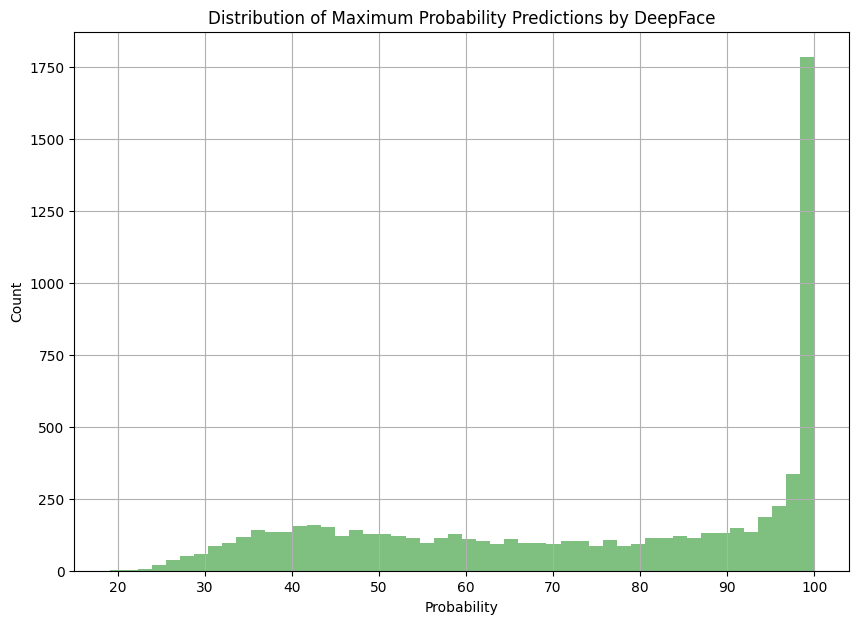

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv('merged_final.csv')
# Define lists with the names of the columns with the race probabilities for each face
prob_columns_face1 = ['deepface_asian', 'deepface_indian', 'deepface_black', 'deepface_white', 'deepface_middle eastern', 'deepface_latino hispanic']
prob_columns_face2 = ['deepface_asian2', 'deepface_indian2', 'deepface_black2', 'deepface_white2', 'deepface_middle eastern2', 'deepface_latino hispanic2']

# Get the maximum probability from each row for the first face
max_prob_face1 = df[prob_columns_face1].max(axis=1)

# Get the maximum probability from each row for the second face
max_prob_face2 = df[prob_columns_face2].max(axis=1)

# Combine the two into a single series
max_prob_all = pd.concat([max_prob_face1, max_prob_face2])

# Plot a histogram of the probabilities
plt.figure(figsize=(10,7))
plt.hist(max_prob_all, bins=50, alpha=0.5, color='g')
plt.title('Distribution of Maximum Probability Predictions by DeepFace')
plt.xlabel('Probability')
plt.ylabel('Count')
plt.grid(True)
plt.show()


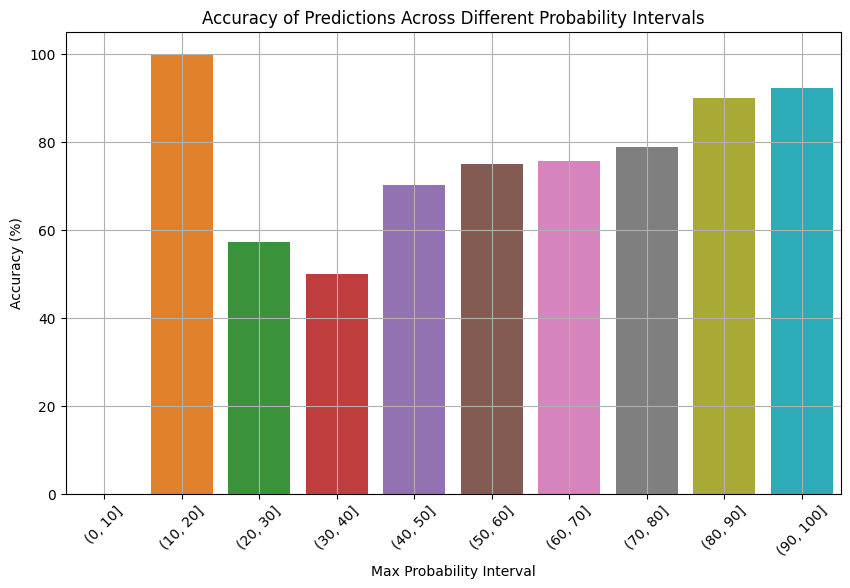

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('merged_final.csv')

# Combine Asian and Indian into a single category
df['deepface_asian_combined'] = df[['deepface_asian', 'deepface_indian']].max(axis=1)

# Create the deepface_prediction column based on the max value among the categories
columns = ['deepface_asian_combined', 'deepface_black', 'deepface_white', 'deepface_middle eastern', 'deepface_latino hispanic']
df['deepface_prediction'] = df[columns].idxmax(axis=1)

# Mapping the predictions to numbers for comparison with 'true_label'
mapping = {
    'deepface_asian_combined': '1',
    'deepface_black': '2',
    'deepface_white': '5',
    'deepface_middle eastern': '4',
    'deepface_latino hispanic': '3'
}
df['deepface_prediction'] = df['deepface_prediction'].map(mapping)

# Remove the rows where 'true_label' is -1 or 8
df_filtered = df[~df['true_label'].isin(['-1', '8'])]

# Determine the max probability value
df_filtered['max_probability'] = df_filtered[['deepface_asian', 'deepface_black', 'deepface_white', 'deepface_middle eastern', 'deepface_latino hispanic']].max(axis=1)

# Create a new column that indicates if the prediction was correct or not
df_filtered['correct_prediction'] = df_filtered.apply(lambda row: 1 if str(row['deepface_prediction']) in str(row['true_label']).split() else 0, axis=1)

# Define probability intervals
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df_filtered['prob_bucket'] = pd.cut(df_filtered['max_probability'], bins=bins)

# Calculate accuracy for each probability interval
accuracy_per_bucket = df_filtered.groupby('prob_bucket')['correct_prediction'].mean() * 100

# Plot the graph
plt.figure(figsize=(10,6))
sns.barplot(x=accuracy_per_bucket.index.astype(str), y=accuracy_per_bucket.values)
plt.xlabel('Max Probability Interval')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Predictions Across Different Probability Intervals')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



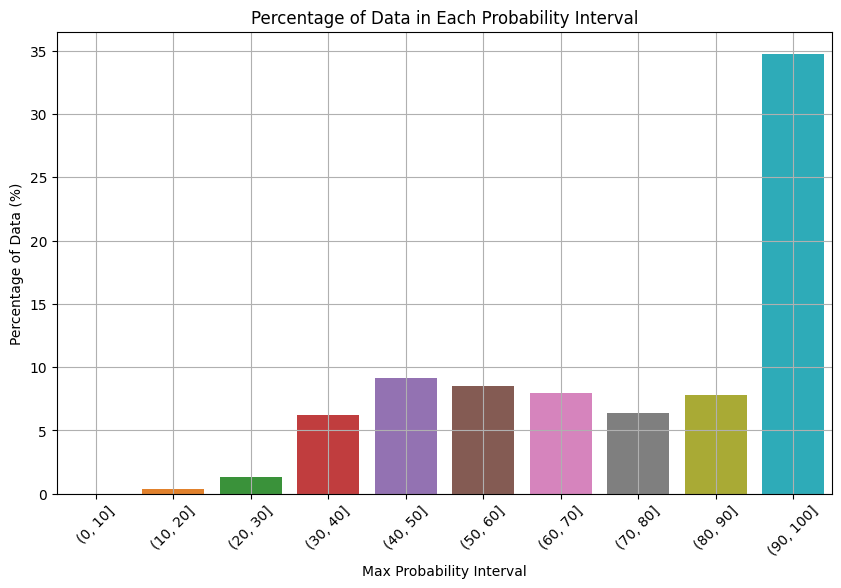

In [ ]:
# Calculate the count of rows in each bin
bin_counts = df_filtered['prob_bucket'].value_counts()

# Normalize the counts to get percentages
bin_percentages = (bin_counts / len(df_filtered)) * 100

# Sort the index (which is the bin) for better visualization
bin_percentages = bin_percentages.sort_index()

# Plot the graph
plt.figure(figsize=(10,6))
sns.barplot(x=bin_percentages.index.astype(str), y=bin_percentages.values)
plt.xlabel('Max Probability Interval')
plt.ylabel('Percentage of Data (%)')
plt.title('Percentage of Data in Each Probability Interval')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
accuracy_per_bucket


prob_bucket
(0, 10]             NaN
(10, 20]     100.000000
(20, 30]      57.142857
(30, 40]      50.000000
(40, 50]      70.212766
(50, 60]      75.000000
(60, 70]      75.609756
(70, 80]      78.787879
(80, 90]      90.000000
(90, 100]     92.178771
Name: correct_prediction, dtype: float64

In [ ]:
bin_percentages

(0, 10]       0.000000
(10, 20]      0.388350
(20, 30]      1.359223
(30, 40]      6.213592
(40, 50]      9.126214
(50, 60]      8.543689
(60, 70]      7.961165
(70, 80]      6.407767
(80, 90]      7.766990
(90, 100]    34.757282
Name: prob_bucket, dtype: float64

In [ ]:
weighted_accuracy = (accuracy_per_bucket * bin_percentages).sum() / 100
print(f"Weighted Accuracy: {weighted_accuracy}%")


Weighted Accuracy: 67.18446601941747%


In [ ]:
(accuracy_per_bucket * bin_percentages / 100).sum()

67.18446601941747

# BWB

In [ ]:
# Creating the WNWtrue_label column
def calculate_WNWtrue_label(row):
    if row['true_label'] in [1,2,3,4]:
        return 1
    else:
        return 2
df = pd.read_csv('merged_final.csv')
df = df[~df['true_label'].isin(['-1', '8'])]
df['WNWtrue_label'] = df.apply(calculate_WNWtrue_label, axis=1)

# Creating the WNWdeepface_white and WNWdeepface_non_white columns
df['WNWdeepface_white'] = df['deepface_white']
df['WNWdeepface_non_white'] = 100 - df['deepface_white']

# Creating the WNWdeepface_prediction column
def calculate_WNWdeepface_prediction(row):
    if row['WNWdeepface_white'] > row['WNWdeepface_non_white']:
        return 1
    else:
        return 2

df['WNWdeepface_prediction'] = df.apply(calculate_WNWdeepface_prediction, axis=1)

df.to_csv('combined_mod_final_wnw.csv', index=False)


In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('merged_final.csv')

# Filter out unlabeled data and unknown cases
df_filtered = df[(df['true_label'] != '-1') & (df['true_label'] != '8')]

# Map the labels into white and non-white
def map_wnw_labels(label):
    if '5' in label and len(label) == 1:  # Only 5 (White)
        return 1
    elif '5' in label:  # Mixed with 5 (White)
        return 0
    else:  # Non-white
        return 2

df_filtered['WNWtrue_label'] = df_filtered['true_label'].apply(map_wnw_labels)

# Create the white and non-white probabilities and prediction
df_filtered['WNWdeepface_white'] = df_filtered['deepface_white']
df_filtered['WNWdeepface_non-white'] = 100 - df_filtered['deepface_white']

# The prediction is the category with the highest probability
df_filtered['WNWdeepface_prediction'] = df_filtered[['WNWdeepface_white', 'WNWdeepface_non-white']].idxmax(axis=1)
df_filtered['WNWdeepface_prediction'] = df_filtered['WNWdeepface_prediction'].map({'WNWdeepface_white': 1, 'WNWdeepface_non-white': 2})

# Calculate max probability
df_filtered['max_probability'] = df_filtered[['WNWdeepface_white', 'WNWdeepface_non-white']].max(axis=1)

# Define function to calculate if prediction is correct
def calculate_accuracy(row):
    if row['WNWdeepface_prediction'] == row['WNWtrue_label'] or row['WNWtrue_label'] == 0:
        return 1
    else:
        return 0

# Apply function to calculate accuracy
df_filtered['correct_prediction'] = df_filtered.apply(calculate_accuracy, axis=1)

# Define bins for grouping probabilities
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
bucket_names = ['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]', '(60, 70]', '(70, 80]', '(80, 90]', '(90, 100]']

# Create bins
df_filtered['prob_bucket'] = pd.cut(df_filtered['max_probability'], bins=bins, labels=bucket_names)

# Calculate accuracy per bucket
accuracy_per_bucket = df_filtered.groupby('prob_bucket')['correct_prediction'].mean()

# Output the results
print(accuracy_per_bucket)


prob_bucket
(0, 10]           NaN
(10, 20]          NaN
(20, 30]          NaN
(30, 40]          NaN
(40, 50]          NaN
(50, 60]     0.547170
(60, 70]     0.644068
(70, 80]     0.666667
(80, 90]     0.819672
(90, 100]    0.932367
Name: correct_prediction, dtype: float64


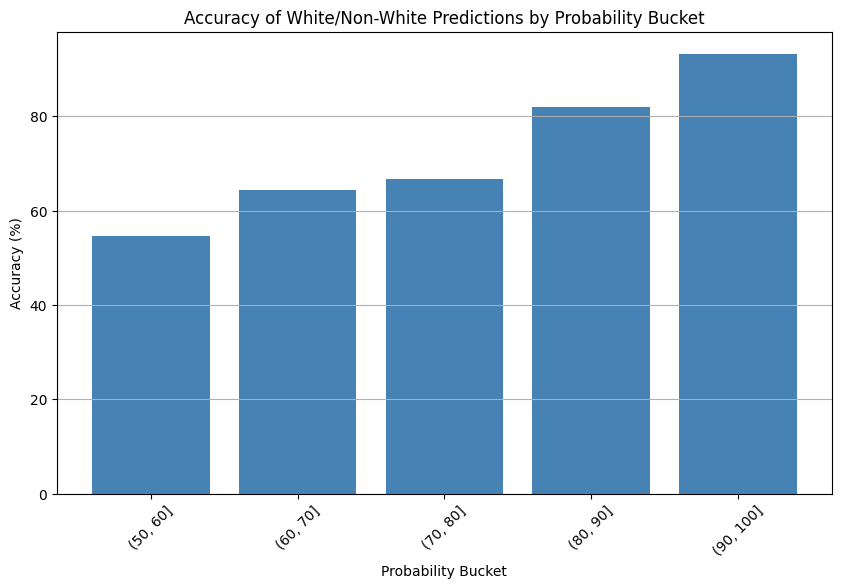

In [ ]:
import matplotlib.pyplot as plt

# Convert accuracy_per_bucket to percentages
accuracy_per_bucket_percentage = accuracy_per_bucket * 100

# Plot the bar graph
plt.figure(figsize=(10,6))
plt.bar(accuracy_per_bucket_percentage.index, accuracy_per_bucket_percentage.values, color='steelblue')

plt.xlabel('Probability Bucket')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of White/Non-White Predictions by Probability Bucket')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


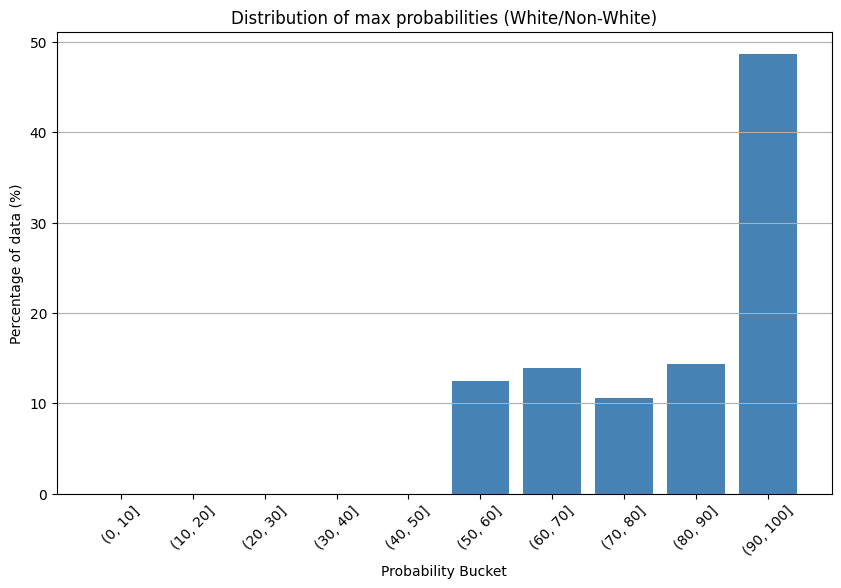

The overall accuracy of the white/non-white predictions is: 66.99%


In [ ]:
# Calculate the percentage of data in each bucket
bin_percentages_WNW = df_filtered['prob_bucket'].value_counts(normalize=True).sort_index() * 100

# Plotting distribution
plt.figure(figsize=(10,6))
plt.bar(bin_percentages_WNW.index, bin_percentages_WNW.values, color='steelblue')
plt.xlabel('Probability Bucket')
plt.ylabel('Percentage of data (%)')
plt.title('Distribution of max probabilities (White/Non-White)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Calculate overall accuracy for white/non-white
overall_accuracy_WNW = df_filtered['correct_prediction'].mean() * 100

print(f'The overall accuracy of the white/non-white predictions is: {overall_accuracy_WNW:.2f}%')


In [ ]:
(accuracy_per_bucket * bin_percentages_WNW).sum()

80.0

In [ ]:
accuracy_per_bucket

prob_bucket
(0, 10]           NaN
(10, 20]          NaN
(20, 30]          NaN
(30, 40]          NaN
(40, 50]          NaN
(50, 60]     0.547170
(60, 70]     0.644068
(70, 80]     0.666667
(80, 90]     0.819672
(90, 100]    0.932367
Name: correct_prediction, dtype: float64

In [ ]:
df.columns

Index(['guest_id', 'name', 'image', 'deepface_asian', 'deepface_indian',
       'deepface_black', 'deepface_white', 'deepface_middle eastern',
       'deepface_latino hispanic', 'deepface_asian2', 'deepface_indian2',
       'deepface_black2', 'deepface_white2', 'deepface_middle eastern2',
       'deepface_latino hispanic2', 'invalid', 'true_number', 'true_label',
       'NamePrism_European-SouthSlavs',
       'NamePrism_Muslim-Pakistanis-Bangladesh',
       'NamePrism_European-Italian-Italy', 'NamePrism_European-Baltics',
       'NamePrism_African-SouthAfrican', 'NamePrism_European-Italian-Romania',
       'NamePrism_Muslim-Nubian', 'NamePrism_European-French',
       'NamePrism_EastAsian-Indochina-Thailand',
       'NamePrism_EastAsian-Indochina-Vietnam', 'NamePrism_Jewish',
       'NamePrism_Muslim-Turkic-CentralAsian',
       'NamePrism_EastAsian-Indochina-Cambodia',
       'NamePrism_Nordic-Scandinavian-Denmark',
       'NamePrism_EastAsian-Indochina-Myanmar', 'NamePrism_Nordic-Fin

# NamePrism

In [ ]:
# Define the mapping from specific to general categories
mapping = {
    "Asian": ["EastAsian", "SouthAsian"],
    "Black": ["African"],
    "Latino": ["Hispanic"],
    "MiddleEastern/NorthAfrican": ["Muslim", "Jewish"],
    "White": ["European", "Nordic", "CelticEnglish", "Greek"]
}

# Create new columns for the general categories
for general, specifics in mapping.items():
    # Identify specific columns that belong to each general category
    specific_columns = [col for col in df.columns if any(specific in col for specific in specifics)]
    # Create new column by summing the specific columns
    df[f"NamePrism_{general}"] = df[specific_columns].sum(axis=1)


In [ ]:
df['NamePrism_White']

0       0.1148
1       0.9871
2       0.6616
3       0.8449
4       0.9533
         ...  
9493    0.8912
9494    0.5303
9495    0.9997
9496    0.1912
9497    0.9955
Name: NamePrism_White, Length: 9498, dtype: float64

In [ ]:
# Define mapping from general categories to numeric labels
category_to_numeric = {"Asian": 1, "Black": 2, "Latino": 3, "MiddleEastern/NorthAfrican": 4, "White": 5}

# Get the general category with the highest probability
df["NamePrism_max_category"] = df[["NamePrism_Asian", "NamePrism_Black", "NamePrism_Latino", "NamePrism_MiddleEastern/NorthAfrican", "NamePrism_White"]].idxmax(axis=1)

# Remove the "NamePrism_" prefix to get only the category name
df["NamePrism_max_category"] = df["NamePrism_max_category"].str.replace("NamePrism_", "")

# Map from category names to numeric labels
df["NamePrism_prediction"] = df["NamePrism_max_category"].map(category_to_numeric)


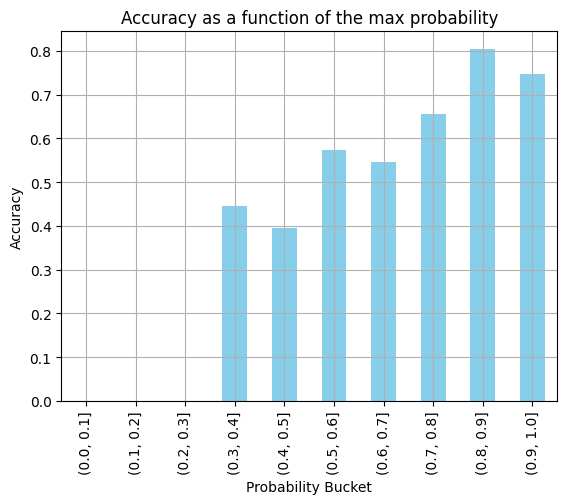

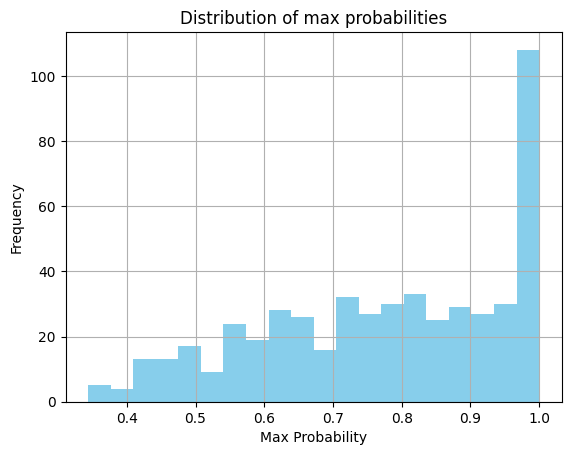

Overall accuracy: 66.60%


In [ ]:
def calculate_accuracy(row):
    true_labels = row['true_label'].split()
    if str(row['NamePrism_prediction']) in true_labels:
        return 1
    else:
        return 0

# Filter rows where true_label is not -1 or 8
df_filtered = df[(df['true_label'] != '-1') & (df['true_label'] != '8')]

# Compute the maximum probability for each row
df_filtered["NamePrism_max_probability"] = df_filtered[["NamePrism_Asian", "NamePrism_Black", "NamePrism_Latino", "NamePrism_MiddleEastern/NorthAfrican", "NamePrism_White"]].max(axis=1)

# Create probability buckets
df_filtered['prob_bucket'] = pd.cut(df_filtered['NamePrism_max_probability'], bins=np.linspace(0, 1, 11))

# Calculate accuracy per bucket
df_filtered['correct_prediction'] = df_filtered.apply(calculate_accuracy, axis=1)
accuracy_per_bucket = df_filtered.groupby('prob_bucket')['correct_prediction'].mean()

# Plot accuracy per bucket
accuracy_per_bucket.plot(kind='bar', color='skyblue')
plt.xlabel('Probability Bucket')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of the max probability')
plt.grid(True)
plt.show()

# Plot distribution of max probabilities
df_filtered['NamePrism_max_probability'].plot(kind='hist', bins=20, color='skyblue')
plt.xlabel('Max Probability')
plt.ylabel('Frequency')
plt.title('Distribution of max probabilities')
plt.grid(True)
plt.show()

# Calculate and print overall accuracy
overall_accuracy = df_filtered['correct_prediction'].mean()
print(f'Overall accuracy: {overall_accuracy*100:.2f}%')


In [ ]:
accuracy_per_bucket

prob_bucket
(0.0, 0.1]    NaN
(0.1, 0.2]    NaN
(0.2, 0.3]    0.0
(0.3, 0.4]    0.0
(0.4, 0.5]    0.0
(0.5, 0.6]    0.0
(0.6, 0.7]    0.0
(0.7, 0.8]    0.0
(0.8, 0.9]    0.0
(0.9, 1.0]    0.0
Name: correct_prediction, dtype: float64

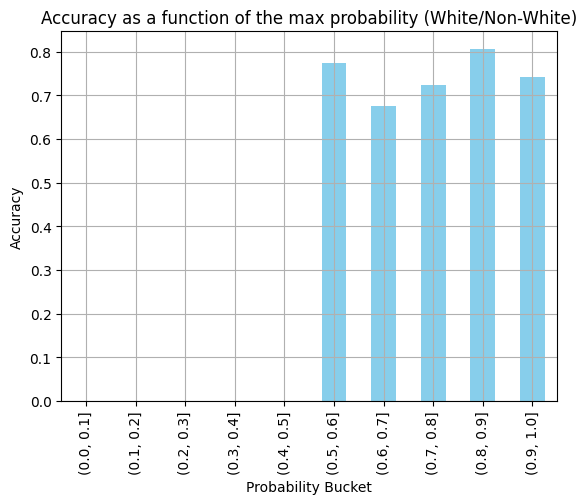

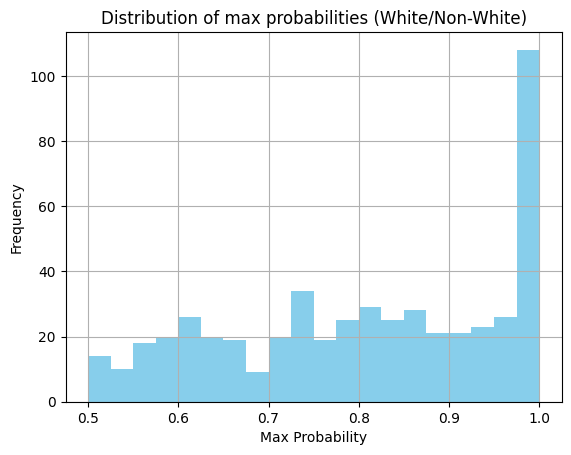

Overall accuracy (White/Non-White): 74.56%


In [ ]:
def map_wnw_label(label_str):
    labels = label_str.split(" ")
    if '5' in labels and len(labels) == 1:
        return 1  # white
    elif '5' in labels:
        return 0  # always correct
    else:
        return 2  # non-white

def calculate_accuracy(row):
    if row['WNWNamePrism_prediction'] == row['WNWtrue_label'] or row['WNWtrue_label'] == 0:
        return 1
    else:
        return 0

# Creating the White/Non-White labels and predictions
df_filtered['WNWtrue_label'] = df_filtered['true_label'].apply(map_wnw_label)
df_filtered['WNWNamePrism_White'] = df_filtered['NamePrism_White']
df_filtered['WNWNamePrism_Non-White'] = 1 - df_filtered['NamePrism_White']
df_filtered['WNWNamePrism_prediction'] = df_filtered[['WNWNamePrism_White', 'WNWNamePrism_Non-White']].idxmax(axis=1).apply(lambda x: 1 if x.endswith('White') else 2)

# Compute the maximum probability for each row
df_filtered["NamePrism_max_probability"] = df_filtered[['WNWNamePrism_White', 'WNWNamePrism_Non-White']].max(axis=1)

# Create probability buckets
df_filtered['prob_bucket'] = pd.cut(df_filtered['NamePrism_max_probability'], bins=np.linspace(0, 1, 11))

# Calculate accuracy per bucket
df_filtered['correct_prediction'] = df_filtered.apply(calculate_accuracy, axis=1)
accuracy_per_bucket = df_filtered.groupby('prob_bucket')['correct_prediction'].mean()

# Plot accuracy per bucket
accuracy_per_bucket.plot(kind='bar', color='skyblue')
plt.xlabel('Probability Bucket')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of the max probability (White/Non-White)')
plt.grid(True)
plt.show()

# Plot distribution of max probabilities
df_filtered['NamePrism_max_probability'].plot(kind='hist', bins=20, color='skyblue')
plt.xlabel('Max Probability')
plt.ylabel('Frequency')
plt.title('Distribution of max probabilities (White/Non-White)')
plt.grid(True)
plt.show()

# Calculate and print overall accuracy
overall_accuracy = df_filtered['correct_prediction'].mean()
print(f'Overall accuracy (White/Non-White): {overall_accuracy*100:.2f}%')


In [ ]:
def map_wnw_label(label_str):
    labels = label_str.split(" ")
    if '5' in labels and len(labels) == 1:
        return 1  # white
    elif '5' in labels:
        return 0  # always correct
    else:
        return 2  # non-white
def calculate_accuracy_per_bucket(df, prob_column, true_label_column, prediction_column, bins=10):
    df['prob_bucket'] = pd.cut(df[prob_column], bins=np.linspace(0, 1, bins+1), include_lowest=True)
    grouped = df.groupby('prob_bucket')

    def calculate_bucket_accuracy(group):
        correct_predictions = group[group[true_label_column] == group[prediction_column]].shape[0]
        total_predictions = group.shape[0]
        return correct_predictions / total_predictions

    return grouped.apply(calculate_bucket_accuracy)


# Creating the White/Non-White labels and predictions
df_filtered['WNWtrue_label'] = df_filtered['true_label'].apply(map_wnw_label)
df_filtered['WNWNamePrism_White'] = df_filtered['NamePrism_White']
df_filtered['WNWNamePrism_Non-White'] = 1 - df_filtered['NamePrism_White']
df_filtered['WNWNamePrism_prediction'] = df_filtered[['WNWNamePrism_White', 'WNWNamePrism_Non-White']].idxmax(axis=1).apply(lambda x: 1 if x.endswith('White') else 2)

# Adjust for always correct cases
df_filtered.loc[df_filtered['WNWtrue_label'] == 0, 'WNWNamePrism_prediction'] = 0

# Calculate accuracies per probability bucket
accuracy_per_bucket = calculate_accuracy_per_bucket(df_filtered, 'WNWNamePrism_White', 'WNWtrue_label', 'WNWNamePrism_prediction')
print(accuracy_per_bucket)

# Plot distribution of max probabilities
plot_prob_distribution(df_filtered, 'WNWNamePrism_White', bins=10)

# Calculate overall accuracy
overall_accuracy = calculate_overall_accuracy(df_filtered, 'WNWtrue_label', 'WNWNamePrism_prediction')
print(f'Overall accuracy: {overall_accuracy*100:.2f}%')

# Plot accuracy per probability interval
plot_accuracy_per_prob_interval(accuracy_per_bucket)


prob_bucket
(-0.001, 0.1]    0.480769
(0.1, 0.2]       0.565217
(0.2, 0.3]       0.652174
(0.3, 0.4]       0.607143
(0.4, 0.5]       0.692308
(0.5, 0.6]       0.833333
(0.6, 0.7]       0.717391
(0.7, 0.8]       0.746667
(0.8, 0.9]       0.875000
(0.9, 1.0]       0.849206
dtype: float64


NameError: ignored

Asian: 64.29%
Black: 55.56%
Latino: 61.54%
Middle Eastern: 71.43%
White: 80.00%


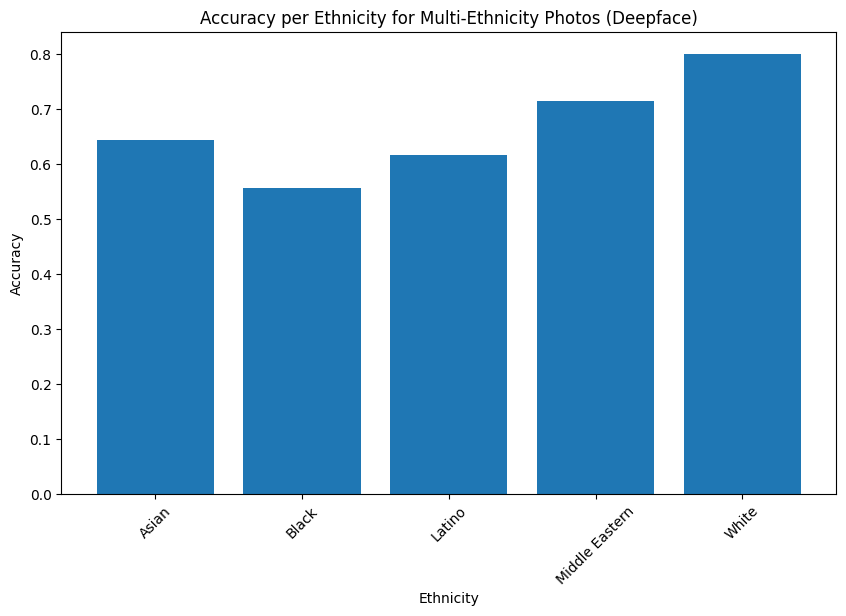

In [ ]:
# First create a DeepFace prediction column
df_filtered['deepface_prediction'] = df_filtered[['deepface_asian', 'deepface_black', 'deepface_latino hispanic', 'deepface_middle eastern', 'deepface_white']].idxmax(axis=1)

# Define ethnicities mapping for DeepFace
deepface_ethnicities = {
    'deepface_asian': '1',
    'deepface_black': '2',
    'deepface_latino hispanic': '3',
    'deepface_middle eastern': '4',
    'deepface_white': '5'
}

# Now create a new DeepFace prediction column with numeric codes for simplicity
df_filtered['deepface_prediction_code'] = df_filtered['deepface_prediction'].map(deepface_ethnicities)

# Then, follow the same steps for multi-ethnicity accuracy calculation
# Create a subset of data containing multiple ethnicities
multi_ethnicity_df = df_filtered[df_filtered['true_label'].str.contains(' ')]

# Define ethnicities
ethnicities = {
    '1': 'Asian',
    '2': 'Black',
    '3': 'Latino',
    '4': 'Middle Eastern',
    '5': 'White'
}

# Initialize accuracy dictionary
accuracy_per_ethnicity = {}

# Calculate accuracy for each ethnicity
for code, ethnicity in ethnicities.items():
    total = 0
    correct = 0
    for i, row in multi_ethnicity_df.iterrows():
        true_labels = row['true_label'].split()
        if code in true_labels:
            total += 1
            if row['deepface_prediction_code'] in true_labels:
                correct += 1
    if total > 0:
        accuracy_per_ethnicity[ethnicity] = correct / total
    else:
        accuracy_per_ethnicity[ethnicity] = np.nan  # Avoid division by zero

# Print accuracy per ethnicity
for ethnicity, accuracy in accuracy_per_ethnicity.items():
    print(f'{ethnicity}: {accuracy*100:.2f}%')

# Plot accuracy per ethnicity
plt.figure(figsize=(10, 6))
plt.bar(accuracy_per_ethnicity.keys(), accuracy_per_ethnicity.values())
plt.xlabel('Ethnicity')
plt.ylabel('Accuracy')
plt.title('Accuracy per Ethnicity for Multi-Ethnicity Photos (Deepface)')
plt.xticks(rotation=45)  # Rotate x-labels for better visibility
plt.show()


In [ ]:
df_filtered.columns

Index(['guest_id', 'name', 'image', 'deepface_asian', 'deepface_indian',
       'deepface_black', 'deepface_white', 'deepface_middle eastern',
       'deepface_latino hispanic', 'deepface_asian2', 'deepface_indian2',
       'deepface_black2', 'deepface_white2', 'deepface_middle eastern2',
       'deepface_latino hispanic2', 'invalid', 'true_number', 'true_label',
       'NamePrism_European-SouthSlavs',
       'NamePrism_Muslim-Pakistanis-Bangladesh',
       'NamePrism_European-Italian-Italy', 'NamePrism_European-Baltics',
       'NamePrism_African-SouthAfrican', 'NamePrism_European-Italian-Romania',
       'NamePrism_Muslim-Nubian', 'NamePrism_European-French',
       'NamePrism_EastAsian-Indochina-Thailand',
       'NamePrism_EastAsian-Indochina-Vietnam', 'NamePrism_Jewish',
       'NamePrism_Muslim-Turkic-CentralAsian',
       'NamePrism_EastAsian-Indochina-Cambodia',
       'NamePrism_Nordic-Scandinavian-Denmark',
       'NamePrism_EastAsian-Indochina-Myanmar', 'NamePrism_Nordic-Fin

In [ ]:
# Map DeepFace columns to NamePrism codes
deepface_to_nameprism_map = {
    'deepface_asian': 1,
    'deepface_black': 2,
    'deepface_latino hispanic': 3,
    'deepface_middle eastern': 4,
    'deepface_white': 5,
    'deepface_asian2': 1,
    'deepface_black2': 2,
    'deepface_latino hispanic2': 3,
    'deepface_middle eastern2': 4,
    'deepface_white2': 5
}
def calculate_bucket_accuracy(group):
    if group.shape[0] == 0:
        return np.nan
    else:
        correct_predictions = group[group[true_label_column] == group[prediction_column]].shape[0]
        total_predictions = group.shape[0]
        return correct_predictions / total_predictions

# Step 1: Find the cases where DeepFace predicted with 50% or over probability
df_deepface_confident = df_filtered[(df_filtered[list(deepface_to_nameprism_map.keys())] >= 50).any(axis=1)]

# Create a DeepFace prediction column mapping it to the corresponding NamePrism code
df_deepface_confident['DeepFace_prediction_code'] = df_deepface_confident[list(deepface_to_nameprism_map.keys())].idxmax(axis=1).map(deepface_to_nameprism_map)

# Step 2: Get cases where NamePrism predicted the same ethnicity
df_agreement = df_deepface_confident[df_deepface_confident['DeepFace_prediction_code'] == df_deepface_confident['NamePrism_prediction']]

# Step 3: Calculate accuracy based on NamePrism probability
# Here I'm considering that NamePrism_max_probability is the maximum probability amongst all NamePrism predictions
accuracy_per_bucket = calculate_accuracy_per_bucket(df_agreement, 'NamePrism_max_probability', 'true_label', 'NamePrism_prediction')

# Graph accuracy per NamePrism probability
accuracy_per_bucket.plot(kind='bar', figsize=(12, 6))
plt.xlabel("NamePrism Prediction Probability")
plt.ylabel("Accuracy")
plt.title("Accuracy of predictions where DeepFace and NamePrism agree, per NamePrism Prediction Probability")
plt.show()


ZeroDivisionError: ignored

In [ ]:
df_filtered.columns

Index(['guest_id', 'name', 'image', 'deepface_asian', 'deepface_indian',
       'deepface_black', 'deepface_white', 'deepface_middle eastern',
       'deepface_latino hispanic', 'deepface_asian2', 'deepface_indian2',
       'deepface_black2', 'deepface_white2', 'deepface_middle eastern2',
       'deepface_latino hispanic2', 'invalid', 'true_number', 'true_label',
       'NamePrism_European-SouthSlavs',
       'NamePrism_Muslim-Pakistanis-Bangladesh',
       'NamePrism_European-Italian-Italy', 'NamePrism_European-Baltics',
       'NamePrism_African-SouthAfrican', 'NamePrism_European-Italian-Romania',
       'NamePrism_Muslim-Nubian', 'NamePrism_European-French',
       'NamePrism_EastAsian-Indochina-Thailand',
       'NamePrism_EastAsian-Indochina-Vietnam', 'NamePrism_Jewish',
       'NamePrism_Muslim-Turkic-CentralAsian',
       'NamePrism_EastAsian-Indochina-Cambodia',
       'NamePrism_Nordic-Scandinavian-Denmark',
       'NamePrism_EastAsian-Indochina-Myanmar', 'NamePrism_Nordic-Fin

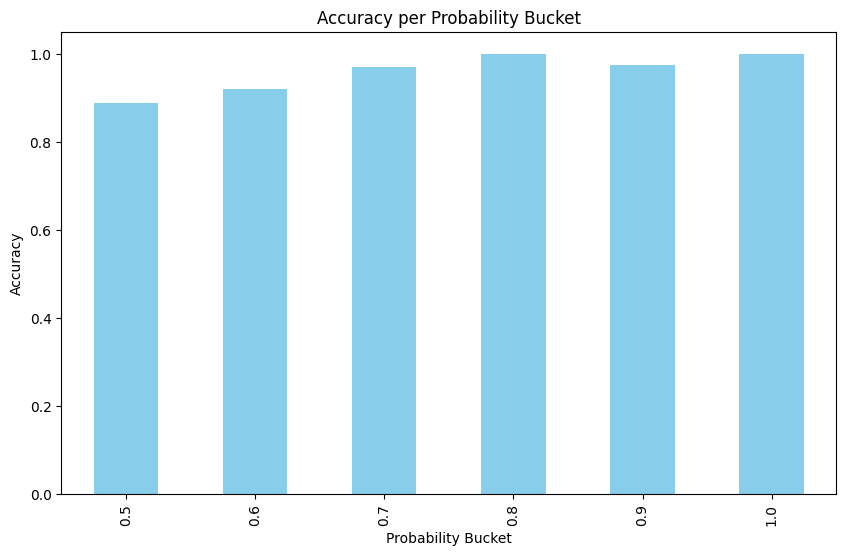

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Mapping dictionary for DeepFace to our defined groups
deepface_to_ethnicity_mapping = {
    "deepface_asian": 1,
    "deepface_black": 2,
    "deepface_latino hispanic": 3,
    "deepface_middle eastern": 4,
    "deepface_white": 5
}

# 1. Filter out the cases where DeepFace is confident (> 50%)
df_deepface_confident = df_filtered[df_filtered[['deepface_asian', 'deepface_black', 'deepface_latino hispanic', 'deepface_middle eastern', 'deepface_white']].max(axis=1) > 50]

# 2. Create prediction column for DeepFace with the ethnicity prediction
df_deepface_confident['deepface_ethnicity_prediction'] = df_deepface_confident[['deepface_asian', 'deepface_black', 'deepface_latino hispanic', 'deepface_middle eastern', 'deepface_white']].idxmax(axis=1).map(deepface_to_ethnicity_mapping)

# Filter out cases where DeepFace's prediction is the same as NamePrism's prediction
df_agreement = df_deepface_confident[df_deepface_confident['deepface_ethnicity_prediction'] == df_deepface_confident['NamePrism_prediction']]

# Define a function to compute accuracy
def calculate_accuracy(df, prob_column, true_label_column, prediction_column):
    df['correct_prediction'] = df.apply(lambda row: str(row[prediction_column]) in row[true_label_column].split(), axis=1)
    df['prob_bucket'] = df[prob_column].apply(lambda x: np.floor(x*10)/10)
    accuracy_per_bucket = df.groupby('prob_bucket')['correct_prediction'].mean()
    return accuracy_per_bucket

# 3. Calculate accuracy based on NamePrism probability
accuracy_per_bucket = calculate_accuracy(df_agreement, 'NamePrism_max_probability', 'true_label', 'NamePrism_prediction')

# Visualize the accuracy per probability bucket
plt.figure(figsize=(10, 6))
plt.grid()
accuracy_per_bucket.plot(kind='bar', color='skyblue')
plt.title("Accuracy per Probability Bucket")
plt.xlabel("Probability Bucket")
plt.ylabel("Accuracy")
plt.show()


In [ ]:
accuracy_per_bucket

prob_bucket
0.5    0.888889
0.6    0.920000
0.7    0.969697
0.8    1.000000
0.9    0.974026
1.0    1.000000
Name: correct_prediction, dtype: float64

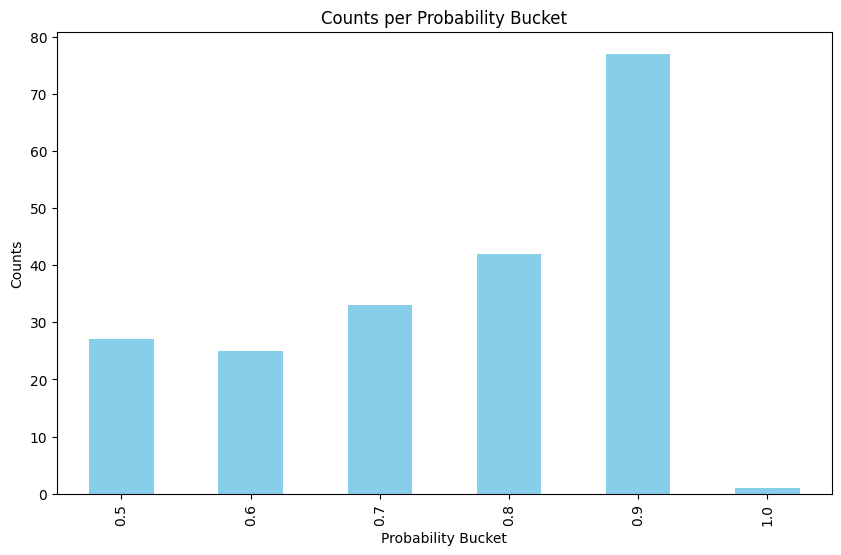

In [ ]:
# Count instances per probability bucket
instances_per_bucket = df_agreement.groupby('prob_bucket').size()

# Visualize the counts per probability bucket
plt.figure(figsize=(10, 6))
instances_per_bucket.plot(kind='bar', color='skyblue')
plt.title("Counts per Probability Bucket")
plt.xlabel("Probability Bucket")
plt.ylabel("Counts")
plt.show()


In [ ]:
# Calculate overall accuracy
overall_accuracy = df_agreement['correct_prediction'].mean()

print(f'Overall accuracy: {overall_accuracy*100:.2f}%')


Overall accuracy: 96.10%


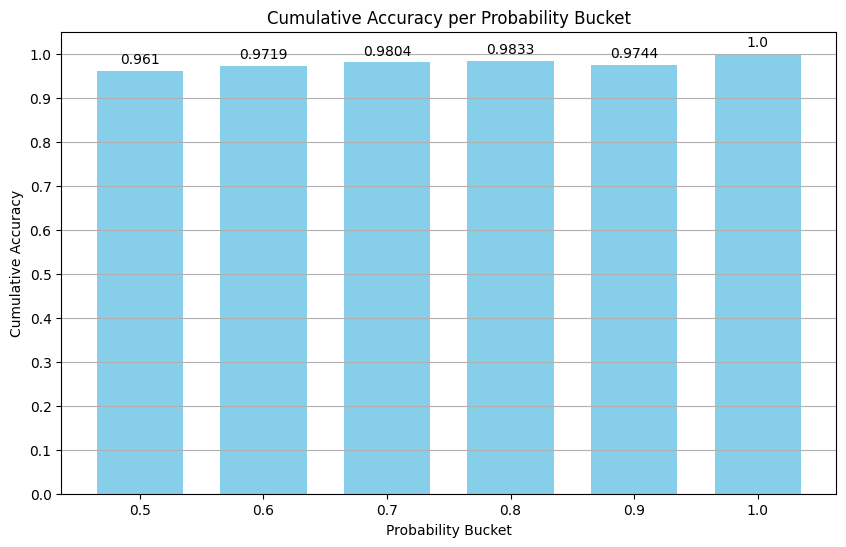

In [ ]:
plt.figure(figsize=(10, 6))
bars = plt.bar(cumulative_accuracy_per_bucket.index, cumulative_accuracy_per_bucket['accuracy'], color='skyblue', width=0.07)

plt.title("Cumulative Accuracy per Probability Bucket")
plt.xlabel("Probability Bucket")
plt.ylabel("Cumulative Accuracy")
plt.yticks(np.arange(0, 1.1, 0.1)) # Show every 10% from 0% to 100%
plt.grid(axis='y')

# Adding accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 4), ha='center', va='bottom')

plt.show()


In [ ]:
cumulative_accuracy_per_bucket['accuracy']

prob_bucket
0.5    0.960976
0.6    0.971910
0.7    0.980392
0.8    0.983333
0.9    0.974359
1.0    1.000000
Name: accuracy, dtype: float64

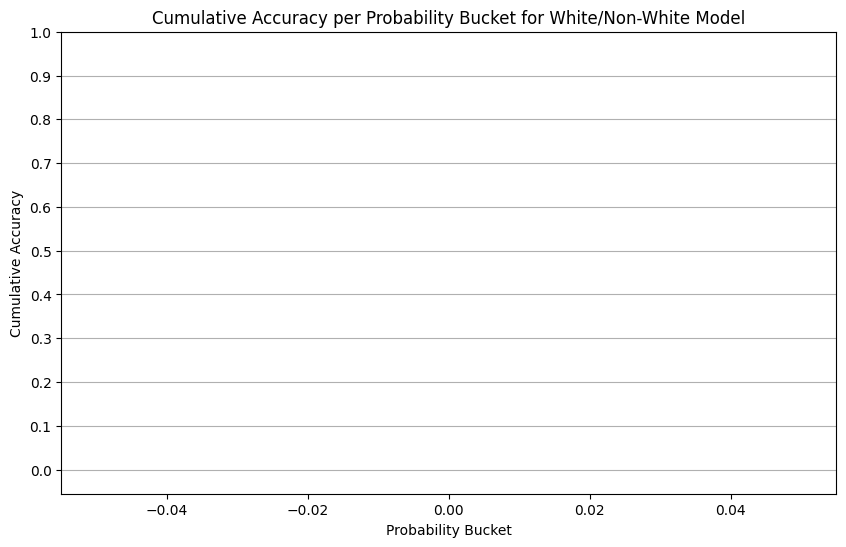

In [ ]:
# Filter out rows with NaN values in the 'deepface_WNW_prediction' column
df_filtered = df_filtered.dropna(subset=['deepface_WNW_prediction'])

# After filtering, we can continue with the rest of the code

# Filter the cases where both DeepFace and NamePrism agree on the predictions
df_filtered_wnw_agree = df_filtered[df_filtered['deepface_WNW_prediction'] == df_filtered['WNWNamePrism_prediction']]

# Create the bucket of NamePrism probabilities
df_filtered_wnw_agree['prob_bucket'] = pd.cut(df_filtered_wnw_agree['WNWNamePrism_White'], bins=np.arange(0, 1.1, 0.1), include_lowest=True)

# Calculate the accuracy per bucket
df_filtered_wnw_agree['correct_prediction'] = df_filtered_wnw_agree['WNWtrue_label'].apply(lambda x: df_filtered_wnw_agree['WNWNamePrism_prediction'] in x.split(' ')).astype(int)
accuracy_per_bucket_wnw = df_filtered_wnw_agree.groupby('prob_bucket')['correct_prediction'].mean()

# Create an accumulative average of the accuracies per bucket
cumulative_accuracy_per_bucket_wnw = accuracy_per_bucket_wnw[::-1].cumsum()[::-1] / (np.arange(len(accuracy_per_bucket_wnw)) + 1)

# For visualization, let's convert the Interval index to its mid-point values
cumulative_accuracy_per_bucket_wnw.index = cumulative_accuracy_per_bucket_wnw.index.map(lambda interval: interval.mid)

# Plot the data
plt.figure(figsize=(10, 6))
bars = plt.bar(cumulative_accuracy_per_bucket_wnw.index, cumulative_accuracy_per_bucket_wnw, color='skyblue', width=0.07)

plt.title("Cumulative Accuracy per Probability Bucket for White/Non-White Model")
plt.xlabel("Probability Bucket")
plt.ylabel("Cumulative Accuracy")
plt.yticks(np.linspace(0, 1, 11)) # Show every 10% from 0% to 100%
plt.grid(axis='y')

# Adding accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, round(yval, 2), ha='center', va='bottom')

plt.show()


In [ ]:
df_filtered['deepface_prediction_code']

TypeError: ignored